## Importing libraries

In [5]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  
import numpy as np  

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append("../")  # Adds the parent directory to the path for custom module imports  

# Custom functions  
# -----------------------------------------------------------------------  
from src.support_handling import MissingValuesHandler, find_outliers  
from src.support_eda import plot_outliers

## Data loading

In [6]:
df = pd.read_csv('../data/output/complete_data.csv', index_col=0)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,11,0,1.0,6,1,0,3.0,4.0,2.0,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,23,1,6.0,3,5,1,3.0,2.0,4.0,2
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,15,3,5.0,2,5,0,2.0,2.0,1.0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,11,3,13.0,5,8,7,4.0,4.0,3.0,2
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,12,2,9.0,2,6,0,4.0,1.0,3.0,3


Let's make a copy of the dataframe just in case, to perform the imputation of nulls and outliers.

In [8]:
df_imputed = df.copy()

We invoke the null manager by instantiating the class with the dataframe. We use the method that shows us the percentage of nulls we have in each column.

In [9]:
handler = MissingValuesHandler(df_imputed)
handler.get_missing_values_percentages().round(2)

NumCompaniesWorked         1.21
TotalWorkingYears          0.57
EnvironmentSatisfaction    1.46
JobSatisfaction            1.14
WorkLifeBalance            2.23
dtype: float64

We have a very small percentage of nulls, less than 2.5% in the column with the most nulls. 

Since it is such a small amount, we could impute them using any method as their impact is minimal. However, we will use a KNN to make the values as realistic as possible.

In [10]:
columns = handler.select_missing_values_columns()
handler.use_knn(list_columns=columns, leave_names=True)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,11,0,1.0,6,1,0,3.0,4.0,2.0,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,23,1,6.0,3,5,1,3.0,2.0,4.0,2
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,15,3,5.0,2,5,0,2.0,2.0,1.0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,11,3,13.0,5,8,7,4.0,4.0,3.0,2
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,12,2,9.0,2,6,0,4.0,1.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,36,No,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,2,Sales Representative,...,17,0,5.0,2,1,0,2.0,4.0,3.0,3
4305,45,No,Travel_Rarely,Sales,1,4,Technical Degree,Male,1,Research Scientist,...,17,3,20.0,3,17,0,2.0,2.0,2.0,3
4332,31,No,Travel_Rarely,Sales,2,5,Life Sciences,Male,2,Sales Representative,...,11,0,7.0,3,4,0,3.4,4.0,3.0,4
4395,40,No,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,1,Manufacturing Director,...,14,1,9.0,4,9,4,1.0,4.0,3.0,2


We verify that there are indeed no null values remaining.

In [12]:
handler.get_missing_values_percentages()

Series([], dtype: float64)

## Outliers

### Univariate Outliers

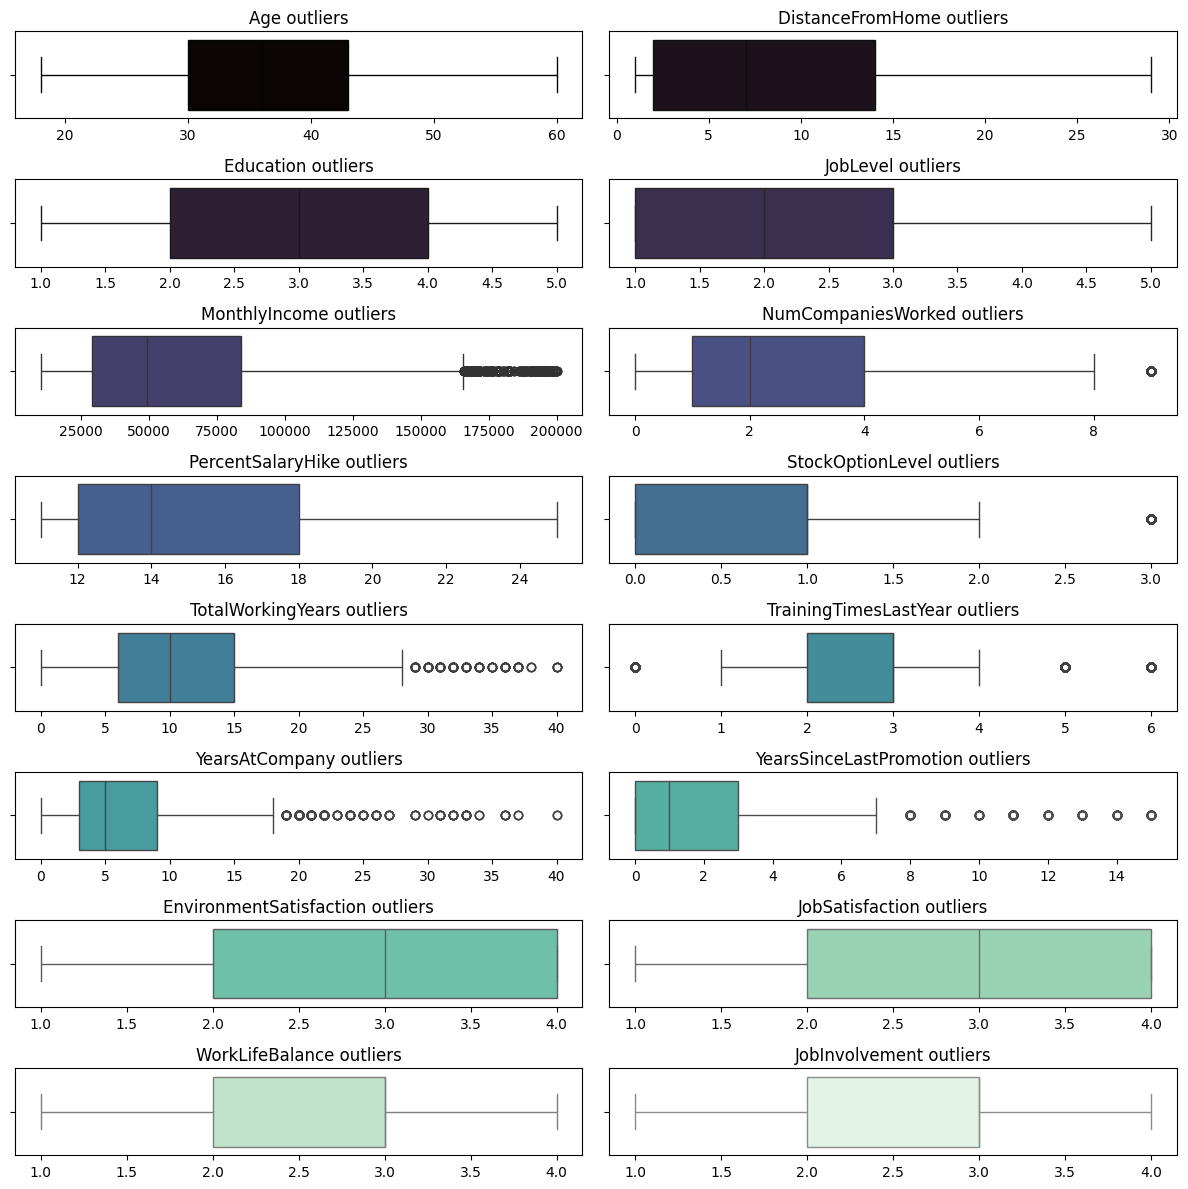

In [8]:
plot_outliers(df_imputed, size=(12,12))

Which columns do we see outliers in?

`MonthlyIncome` has a large number of outliers in the higher range. However, this is common in salary distributions as they tend to exhibit long tails in the higher value ranges. The most extreme values do not appear to be erroneous.

Something similar happens with `TotalWorkingYears`, `YearsAtCompany`, and `YearsSinceLastPromotion`. It is most common for these to be fewer, but there are always individuals who have been working for a long time, staying at the same company, or going a long time without receiving a promotion.

The case of `TrainingTimesLastYear` is interesting; the usual range is between 1 and 4, where cases not only above 4 are considered outliers but 0 is also considered an outlier.

`StockOption` is more of a categorical variable, but we can see that the group with a value of 3 is much less common than the others.

### Multivariate Outliers

Which columns do we want to consider? The numerical ones.

In [14]:
num_cols = df_imputed.select_dtypes(include=np.number).columns.to_list()

We select the columns that we will display in the outlier selection.

In [15]:
show_cols = ['Age',
             'Attrition',
             'Education',
             'Gender',
             'JobLevel',
             'JobRole',
             'MaritalStatus',
             'MonthlyIncome',
             'NumCompaniesWorked',
             'PercentSalaryHike',
             'TotalWorkingYears',
             'TrainingTimesLastYear',
             'YearsAtCompany',
             'YearsSinceLastPromotion',
             'EnvironmentSatisfaction',
             'JobSatisfaction']

Let's look at the 0.5% most atypical values identified using `LocalOutlierFactor`.

In [18]:
df_outliers_lof = find_outliers(df_imputed, num_cols, method="lof", contamination=0.005)[0]

df_outliers_lof[df_outliers_lof['outlier'] == -1][show_cols]

,Age,Attrition,Education,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction
163,29.0,Yes,4.0,Male,3.0,Research Scientist,Married,17900.0,5.0,16.0,6.0,4.0,2.0,1.0,3.0,2.0
235,44.0,No,4.0,Male,2.0,Sales Executive,Single,19510.0,4.0,22.0,10.0,4.0,2.0,0.0,1.0,3.0
260,38.0,No,3.0,Male,5.0,Research Scientist,Single,147560.0,0.0,20.0,8.0,3.0,7.0,0.0,4.0,4.0
611,46.0,No,4.0,Male,3.0,Manager,Married,17020.0,5.0,21.0,25.0,2.0,4.0,0.0,4.0,2.0
652,23.0,No,3.0,Male,3.0,Laboratory Technician,Married,18780.0,1.0,13.0,1.0,2.0,1.0,0.0,4.0,3.0
810,28.0,Yes,3.0,Male,2.0,Laboratory Technician,Single,17060.0,7.0,12.0,8.0,3.0,0.0,0.0,3.0,1.0
1023,35.0,Yes,4.0,Male,2.0,Research Scientist,Single,19040.0,1.0,22.0,10.0,4.0,10.0,7.0,3.0,4.0
1087,35.0,No,1.0,Male,2.0,Laboratory Technician,Married,18590.0,0.0,25.0,4.0,2.0,3.0,0.0,4.0,2.0


We don't see anything excessively unusual, and without more specific information, it's difficult to determine if the data is incorrect. For now, we will keep them.

However, if we use the `IsolationForest` method...

In [19]:
df_outliers_ifo = find_outliers(df_imputed, num_cols, method="ifo", contamination=0.005)[0]

df_outliers_ifo[df_outliers_ifo['outlier'] == -1][show_cols]

,Age,Attrition,Education,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction
153,60.0,No,3.0,Female,1.0,Manufacturing Director,Married,22690.0,5.0,18.0,33.0,4.0,29.0,11.0,1.0,1.0
286,47.0,No,3.0,Male,1.0,Research Scientist,Divorced,54410.0,9.0,22.0,28.0,6.0,22.0,11.0,4.0,3.0
395,50.0,No,3.0,Female,1.0,Laboratory Technician,Divorced,42980.0,1.0,20.0,31.0,6.0,31.0,14.0,1.0,1.0
656,55.0,No,3.0,Female,2.0,Manager,Divorced,48590.0,1.0,24.0,34.0,3.0,33.0,15.0,4.0,2.0
668,43.0,No,2.0,Female,1.0,Laboratory Technician,Single,195020.0,3.0,18.0,23.0,3.0,21.0,15.0,4.0,4.0
820,44.0,No,1.0,Male,1.0,Sales Representative,Married,107610.0,3.0,11.0,24.0,5.0,20.0,14.0,4.0,1.0
1275,59.0,No,3.0,Male,1.0,Laboratory Technician,Single,166060.0,7.0,11.0,28.0,6.0,21.0,7.0,1.0,1.0
1338,58.0,Yes,2.0,Female,1.0,Research Scientist,Married,43850.0,1.0,13.0,40.0,2.0,40.0,15.0,4.0,4.0


In this case, we do see something more interesting:

The Isolation Forest identifies individuals with a low `JobLevel`, but some have a high `MonthlyIncome` with varying levels of satisfaction. All of them have a high `YearsSinceLastPromotion` and have been with the company for a long time.

It's possible that some of this data is incorrect since it is unusual, though not impossible. Based on the rest of the information, it is possible that the `JobLevel` values are incorrect, but we cannot confirm this either. For now, we will leave them as they are.

---

## Save data

In [20]:
df_imputed.to_csv('../data/output/complete_data_imputed.csv')